In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.spatial.distance import cdist
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster 
from plotly.offline import iplot
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from pandas.plotting import parallel_coordinates
from fonction import *

<div style="display: flex; background-color: RGB(255,114,0);" >
<h1 style="margin: auto; padding: 30px; ">Analyse exploratoire </h1>
</div>

Ce dataset regroupe l'ensemble des indicateurs permettant de réaliser le classement des pays.
Il contient 7 variables que l'on pourra étudier : 
* Score : Score de bonheur
* GDP per capita : PIB par habitant
* Social support : Soutien social
* Healthy life expectancy : Espérance de vie en bonne santé
* Freedom to make life choices : Liberté des choix de vie
* Generosity : Générosité
* Perceptions of corruption : Corruption

In [22]:
df = pd.read_csv("Rapport-bonheur.csv")
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


(156, 9)
------------------------------------
Overall rank                      int64
Country or region                object
Score                           float64
GDP per capita                  float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
dtype: object
------------------------------------
Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64
------------------------------------


<AxesSubplot:>

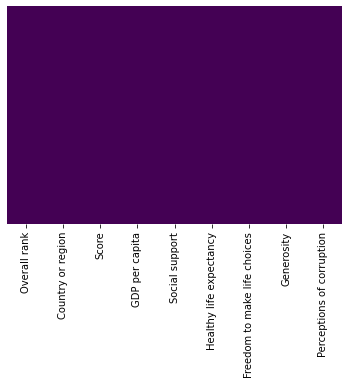

In [23]:
print(df.shape)
print('------------------------------------')
print(df.dtypes)
print('------------------------------------')
print(df.isna().sum())
print('------------------------------------')
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [24]:
df.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [25]:
round(df.corr(), 2)

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Overall rank,1.00,-0.99,-0.80,-0.77,-0.79,-0.55,-0.05,-0.35
Score,-0.99,1.00,0.79,0.78,0.78,0.57,0.08,0.39
GDP per capita,-0.80,0.79,1.00,0.75,0.84,0.38,-0.08,0.30
Social support,-0.77,0.78,0.75,1.00,0.72,0.45,-0.05,0.18
Healthy life expectancy,-0.79,0.78,0.84,0.72,1.00,0.39,-0.03,0.30
Freedom to make life choices,-0.55,0.57,0.38,0.45,0.39,1.00,0.27,0.44
Generosity,-0.05,0.08,-0.08,-0.05,-0.03,0.27,1.00,0.33
Perceptions of corruption,-0.35,0.39,0.30,0.18,0.30,0.44,0.33,1.00


<AxesSubplot:>

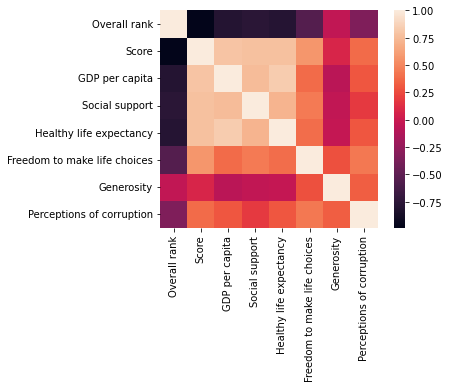

In [26]:
sns.heatmap(df.corr(), square = True)

In [27]:
lst = ['GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption']
for i in lst:
    pearson_coef, p_value = stats.pearsonr(df['Score'], df[i])
    print("The Pearson Correlation Coefficient for {} is".format(i), pearson_coef)  

The Pearson Correlation Coefficient for GDP per capita is 0.7938828678781276
The Pearson Correlation Coefficient for Social support is 0.7770577880638643
The Pearson Correlation Coefficient for Healthy life expectancy is 0.7798831492425831
The Pearson Correlation Coefficient for Freedom to make life choices is 0.5667418257199902
The Pearson Correlation Coefficient for Generosity is 0.07582369490389654
The Pearson Correlation Coefficient for Perceptions of corruption is 0.3856130708664788


**On remarque que le score est corrélé principalement par 3 variables : GDP per capita, Healthy life expectancy et Social support.**

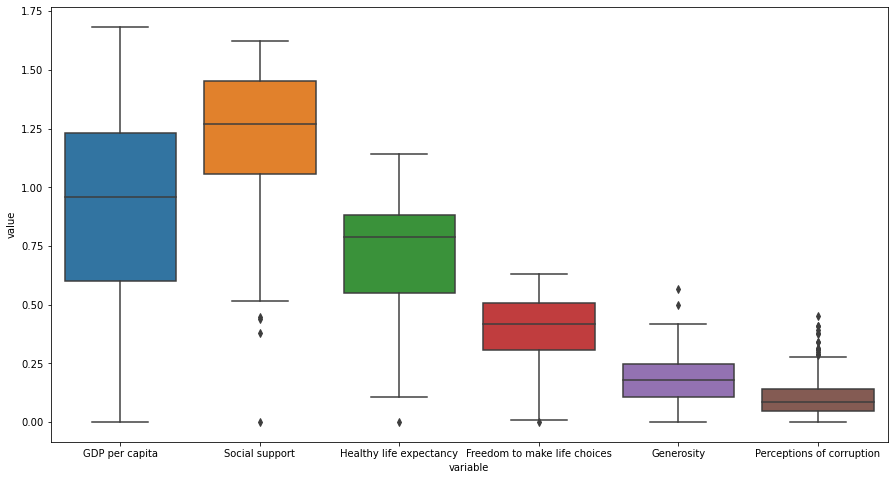

In [28]:
plt.figure(figsize=(15,8))
sns.boxplot(x="variable", y="value", data=pd.melt(df.drop(['Overall rank', 'Country or region', 'Score'], axis=1)))
plt.show()

In [29]:
# Q1 = d.quantile(0.25)
# Q3 = d.quantile(0.75)
# IQR = Q3 - Q1
# IQR

**Je décide de conserver les outliers pour ne pas fausser la pertinence du classement.**

<div style="display: flex; background-color: RGB(0,128,0);" >
<h1 style="margin: auto; padding: 30px; ">Preprocessing des données </h1>
</div>

In [30]:
ss = StandardScaler()
lst_drop = ['Country or region', 'Score', 'Overall rank']
df_scaled = ss.fit_transform(df.drop(lst_drop, axis=1))
df_scaled = pd.DataFrame(df_scaled,index=df.index, columns=df.drop(lst_drop, axis=1).columns)

for col in lst_drop:
    df_scaled = pd.concat([df_scaled, df[col]], axis=1)
    first_column = df_scaled.pop(col)
    df_scaled.insert(0,col, first_column)
    
df_scaled.set_index('Country or region', inplace=True)
print("Dataset après StandardScaler")
print('---------------------------------')
df_scaled.head()

Dataset après StandardScaler
---------------------------------


,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Country or region,,,,,,,,
Finland,1,7.769,1.095042,1.268098,1.080422,1.424282,-0.335404,2.996757
Denmark,2,7.600,1.203324,1.221154,1.121857,1.396277,0.707265,3.177158
Norway,3,7.554,1.467734,1.251332,1.254446,1.473292,0.907373,2.444941
Iceland,4,7.494,1.195769,1.392163,1.246159,1.389276,1.781530,0.078500
Netherlands,5,7.488,1.236060,1.050146,1.134287,1.151229,1.444506,1.988632


<div style="display: flex; background-color: RGB(128,0,128);" >
<h1 style="margin: auto; padding: 30px; ">Elbow method</h1>
</div>

In [31]:
X = df_scaled.drop(['Overall rank', 'Score'], axis=1)
K = range(1, 10)
distortions, inertias, mapping1, mapping2 = Elbow_method(X, K)

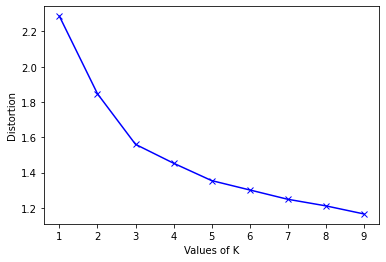

In [32]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.show()

**Affichange des valeurs Distortion.**

In [33]:
show_distortion_Inertia(mapping1, mapping2)        

Valeurs de Distortions : 
------------------------
1 : 2.286200490730045
2 : 1.8470395091315073
3 : 1.5602532825983875
4 : 1.453273169030931
5 : 1.3547784173797344
6 : 1.3018707877314861
7 : 1.2489497130832923
8 : 1.2116934802695003
9 : 1.1659022549833373

Valeurs d'Inertia' : 
------------------------
1 : 936.0000000000002
2 : 622.2806032665978
3 : 440.57877573524075
4 : 381.783478844089
5 : 334.6604527532617
6 : 301.3601666615391
7 : 280.5476108577221
8 : 261.9625944396131
9 : 243.5334686919881


**Après analyses de ces résultats, je vais garder une valeur de 3 pour k.**

<div style="display: flex; background-color: RGB(0,128,128);" >
<h1 style="margin: auto; padding: 30px; ">Clustering</h1>
</div>

In [34]:
k = 3

clust_labels, centroids = clustering_Kmeans(X, k)
kmeans_df = pd.DataFrame(clust_labels, index=df_scaled.index)

# df_scaled['kmeans'] = kmeans
df_scaled.insert((X.shape[1]),'kmeans',kmeans_df)

In [35]:
df_scaled['kmeans'].value_counts()

0    82
1    46
2    28
Name: kmeans, dtype: int64

In [36]:
df_scaled

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,kmeans,Generosity,Perceptions of corruption
Country or region,,,,,,,,,
Finland,1,7.769,1.095042,1.268098,1.080422,1.424282,2,-0.335404,2.996757
Denmark,2,7.600,1.203324,1.221154,1.121857,1.396277,2,0.707265,3.177158
Norway,3,7.554,1.467734,1.251332,1.254446,1.473292,2,0.907373,2.444941
Iceland,4,7.494,1.195769,1.392163,1.246159,1.389276,2,1.781530,0.078500
Netherlands,5,7.488,1.236060,1.050146,1.134287,1.151229,2,1.444506,1.988632
...,...,...,...,...,...,...,...,...,...
Rwanda,152,3.334,-1.375303,-1.669224,-0.460929,1.137227,1,0.338645,3.187770
Tanzania,153,3.231,-1.080675,-1.085783,-0.937421,0.171040,1,0.960033,0.386244
Afghanistan,154,3.203,-1.397967,-2.319726,-1.509213,-2.748526,1,-0.282744,-0.908401


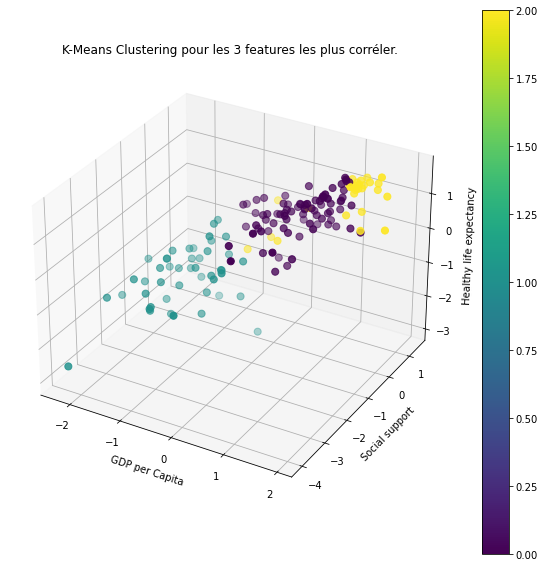

In [37]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X['GDP per capita'],X['Social support'], X['Healthy life expectancy'],
                     c=kmeans_df[0],s=50)
ax.set_title('K-Means Clustering pour les 3 features les plus corréler.')
ax.set_xlabel('GDP per Capita')
ax.set_ylabel('Social support')
ax.set_zlabel('Healthy life expectancy')
plt.colorbar(scatter)
plt.show()

**Essai pour k = 4**

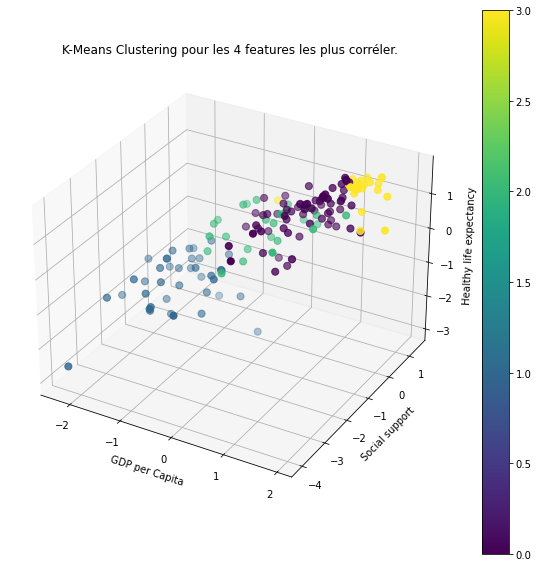

In [38]:
k_4 = 4

clust_labels_4, centroids_4 = clustering_Kmeans(X, k_4)
kmeans_df_4 = pd.DataFrame(clust_labels_4, index=df_scaled.index)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X['GDP per capita'],X['Social support'], X['Healthy life expectancy'],
                     c=kmeans_df_4[0],s=50)
ax.set_title('K-Means Clustering pour les 4 features les plus corréler.')
ax.set_xlabel('GDP per Capita')
ax.set_ylabel('Social support')
ax.set_zlabel('Healthy life expectancy')
plt.colorbar(scatter)
plt.show()

**Test non concluant, la répartion sur 3 clusters semble plus pertinente comme le laisser penser les indicateurs précédents.**

****************************

In [39]:
data = df_scaled.iloc[:,2:].drop('kmeans', axis=1)

pca, X_reduced, X_reduceddf = PCA_df(data, clust_labels, X)

print(X_reduceddf['cluster'].value_counts())
print('---------------------------------------------')
X_reduceddf.head()

0    82
1    46
2    28
Name: cluster, dtype: int64
---------------------------------------------


,PC1,PC2,cluster
Country or region,,,
Finland,-3.134226,1.053542,2
Denmark,-3.292053,1.836057,2
Norway,-3.338247,1.537896,2
Iceland,-2.592776,0.945854,2
Netherlands,-2.835104,1.685571,2


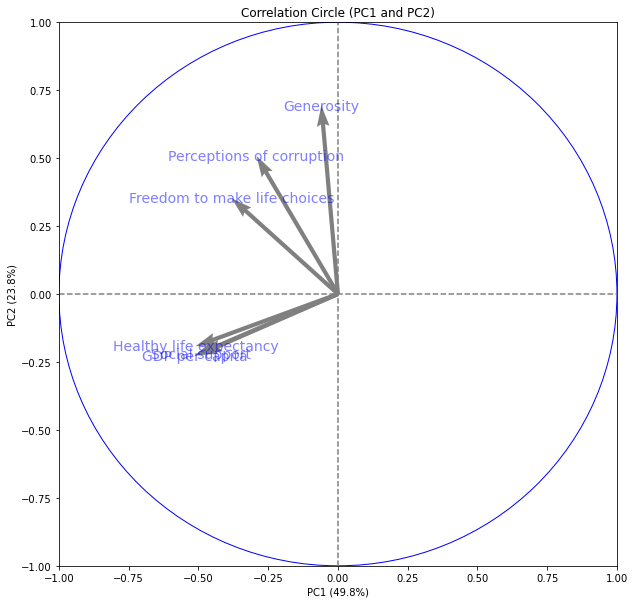

In [40]:
pcs = pca.components_ 
display_circles(pcs, 6, pca, [(0,1)], labels = np.array(X.columns),) 

**PC1 est donc composé de 'Generosity', 'Perceptions of corruption', 'Freedom to make life choices'.**

**PC2 est quant à lui composé de 'GDP per capita', 'Social support', 'Healthy life expectancy' soit les 3 variables les plus corréler au score.**

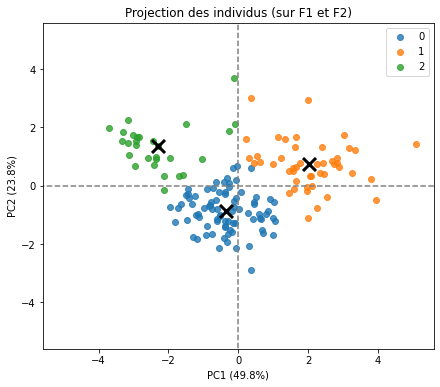

In [41]:
centres_reduced = pca.transform(centroids)
display_factorial_planes(X_reduced, 2, pca, [(0,1)], illustrative_var = clust_labels, alpha = 0.8)
plt.scatter(centres_reduced[:, 0], centres_reduced[:, 1],
            marker='x', s=169, linewidths=3,
            color='k', zorder=10)
plt.show()

In [42]:
fig = px.scatter(X_reduced, x=0, y=1, color=clust_labels, hover_data=[X.index])
fig.show()

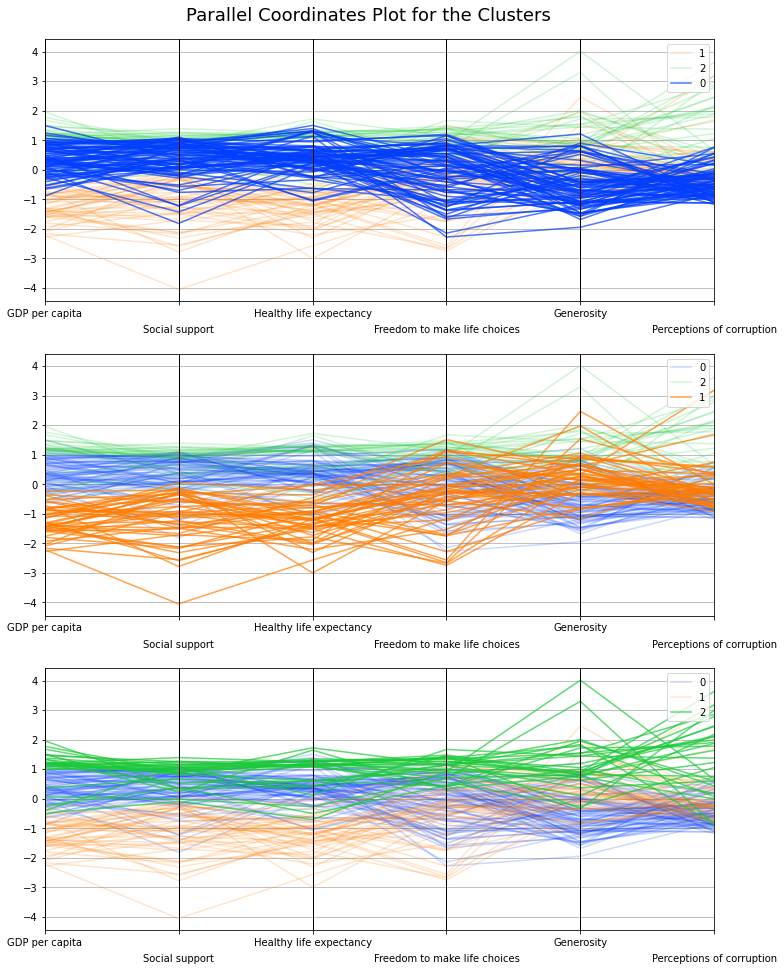

In [43]:
X_clustered = pd.DataFrame(df_scaled, index=X.index, columns=X.columns)
X_clustered["cluster"] = clust_labels

display_parallel_coordinates(X_clustered, k)

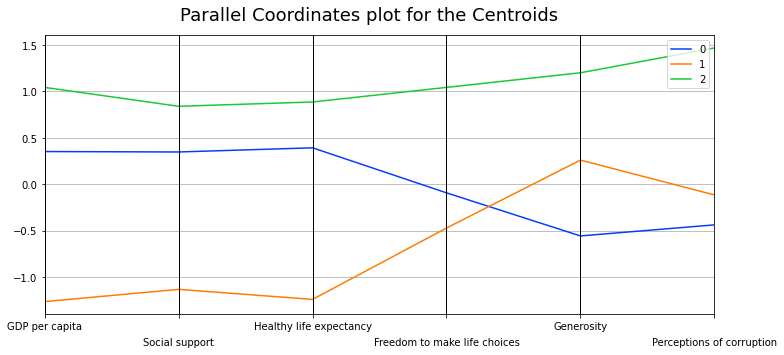

In [44]:
# Create a data frame containing our centroids
centroids_df = pd.DataFrame(centroids, columns=X.columns)
centroids_df['cluster'] = centroids_df.index

display_parallel_coordinates_centroids(centroids_df, k)

*************************
*NOTE : LES NUMEROS DE CLUSTERS ET COULEURS CHANGENT POUR CHAQUE EXECUTION - LES COMMENTAIRES DOIVENT ÊTRE CORRIGER A CHAQUE FOIS.*
*************************

<span style="color:blue">cluster 0 :</span>
* Hautes valeurs en GDP per capita, Social support et Healthy life expectancy mais un faible niveau de Freedom to make life choices, Perceptions of corruption et en particulié Generosity

<span style="color:orange">cluster 1 :</span> 
* Fortes valeurs globales, en particulier Perceptions of corruption. Cependant, Social support et Healthy life expectancy sont en retrait des autres variables.

<span style="color:green">cluster 2 :</span> 
* Très faible valeurs globales, en particulier pour GDP per capita, Social support et Healthy life expectancy. Par ailleurs, Freedom to make life choices, Perceptions of corruption et particulié Generosity sont nettements plus fortes que les autres variables.

In [45]:
data = [dict(type='choropleth',
             locations = X_clustered.index,
             locationmode = 'country names',
             z = X_clustered['cluster'],
             text = X_clustered.index,
             colorbar = {'title':'Cluster Group'})]
layout = dict(title='Grouping of Countries based on Clustering',
              geo=dict(showframe = False))
map3 = dict(data=data, layout=layout)
iplot(map3)

<div style="display: flex; background-color: RGB(245,239,140);" >
<h1 style="margin: auto; padding: 30px; color: black; ">Analyse complémentaire</h1>
</div>

In [46]:
create_scatter(df_scaled, 'Healthy life expectancy',"Score")

In [47]:
create_scatter(df_scaled, 'Freedom to make life choices', "Score")

In [48]:
create_scatter(df_scaled, 'kmeans', "Score")

*********************

**Petite étude sur le cas de la France par rapport à son cluster.**

In [49]:
df_plot=df_scaled[df_scaled['kmeans'] == df_scaled.loc['France'][6]]
df_plot.loc['mean'] = df_plot.mean()

/home/vincent/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:723: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [50]:
first = df_plot.iloc[0].name
last = df_plot.iloc[df_plot.shape[0]-2].name
index_list = ['France', first, last, 'mean']

france_df = df_plot.loc[df_plot.index.isin(index_list)].drop(['Overall rank', 'Score', 'kmeans'], axis=1)

fig = px.bar(
    france_df,
    x=france_df.columns,
    y=france_df.index,
    orientation='h',
)
fig.show()